# Machine Learning in Python - Predictive Modelling
### FashionMNIST 


#### Imports

In [1]:
import os
import subprocess
from IPython.display import display, HTML, Image
import io
from operator import itemgetter

from TAS_Python_Utilities import data_viz
from TAS_Python_Utilities import data_viz_target
from TAS_Python_Utilities import visualize_tree

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neighbors

from xgboost import XGBClassifier

from sklearn.preprocessing import label_binarize
%matplotlib inline
%qtconsole

### Load & Partition Data

In [2]:
dframe = pd. read_csv(r"D:\Semester2\AML\Lab1\fashionmnist\fashion-mnist_train.csv")
dframe.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Only 10% data is to be processed.

In [3]:
data_sampling_rate = 0.1
dframe = dframe.sample(frac = data_sampling_rate)

Examine the distribution of the two classes

In [4]:
dframe["label"].value_counts()

2    617
3    616
8    614
9    611
0    603
1    600
4    598
5    589
7    578
6    574
Name: label, dtype: int64

In [5]:
display(dframe.select_dtypes(include=[np.number]).describe())
#display(dframe.select_dtypes(include=[np.object]).describe()) For categorical features(Since no categorical features in the dataset.)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,6000.000000,6000.0,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,...,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000,6000.000000
mean,4.486667,0.0,0.012667,0.074333,0.122667,0.249333,0.389667,0.655833,1.919167,5.240167,...,34.586667,22.967667,16.823333,17.730000,22.418833,17.338333,8.250833,2.472000,0.840500,0.033000
std,2.884015,0.0,0.514992,3.040288,3.031581,4.152916,5.483080,6.983350,12.717229,22.526978,...,57.225035,47.974961,42.007042,43.574089,50.874559,44.158916,28.584356,16.491034,9.385507,0.961283
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,0.0,34.000000,226.000000,145.000000,148.000000,184.000000,172.000000,200.000000,237.000000,...,248.000000,237.000000,241.000000,249.000000,255.000000,255.000000,252.000000,253.000000,255.000000,54.000000


In [6]:
#data_viz(dframe)

In [7]:
#data_viz_target(dframe, "label")

In [8]:
X = dframe.iloc[:,1:]
Y = np.array(dframe["label"])

# Normalize the input, X so as to bring X in range (0,1)
x = X/255

Split the data into a training set, a vaidation set, and a test set

In [9]:
X_train_plus_valid, X_test, y_train_plus_valid, y_test \
    = train_test_split(X, Y, random_state=0, \
                                    train_size = 0.7)

X_train, X_valid, y_train, y_valid \
    = train_test_split(X_train_plus_valid, \
                                        y_train_plus_valid, \
                                        random_state=0, \
                                        train_size = 0.5/0.7)

### A Very Simple Decision Tree

In [10]:
#Train the decision tree
my_tree = \
    tree.DecisionTreeClassifier(criterion="entropy")
my_tree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Visualise the decision tree so we can see what it is doing!

In [11]:
feature_names = list(X_train.columns)
visualize_tree(my_tree, feature_names, fileName='dt_over.png')
Image(filename='dt_over.png') 

### Evaluating Model Performance



Assess the performance of the decision tree on the training set

In [12]:
# Make a set of predictions for the training data
y_pred = my_tree.predict(X_train)

# Print performance details
accuracy = \
metrics.accuracy_score(y_train, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))

print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print(metrics.confusion_matrix(y_train, y_pred))

# Print nicer homemade confusion matrix
print("Confusion Matrix")
pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       295
           1       1.00      1.00      1.00       307
           2       1.00      1.00      1.00       320
           3       1.00      1.00      1.00       289
           4       1.00      1.00      1.00       302
           5       1.00      1.00      1.00       310
           6       1.00      1.00      1.00       276
           7       1.00      1.00      1.00       285
           8       1.00      1.00      1.00       297
           9       1.00      1.00      1.00       319

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000

[[295   0   0   0   0   0   0   0   0   0]
 [  0 307   0   0   0   0   0   0   0   0]
 [  0   0 320   0   0   0   0   0   0   0]
 [  0   0   0 289   0   0   0   0   0   0]
 [  0   0   0   0 302   0   0   0   0   0]
 [  0   0   

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,295,0,0,0,0,0,0,0,0,0,295
1,0,307,0,0,0,0,0,0,0,0,307
2,0,0,320,0,0,0,0,0,0,0,320
3,0,0,0,289,0,0,0,0,0,0,289
4,0,0,0,0,302,0,0,0,0,0,302
5,0,0,0,0,0,310,0,0,0,0,310
6,0,0,0,0,0,0,276,0,0,0,276
7,0,0,0,0,0,0,0,285,0,0,285
8,0,0,0,0,0,0,0,0,297,0,297


Assess the performance of the tree on the validation dataset

In [13]:
# Make a set of predictions for the test data
y_pred = my_tree.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print(metrics.confusion_matrix(y_valid, y_pred))

# Print nicer confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.6916666666666667
              precision    recall  f1-score   support

           0       0.71      0.64      0.67       121
           1       0.94      0.86      0.90       117
           2       0.52      0.56      0.54       115
           3       0.73      0.71      0.72       120
           4       0.55      0.58      0.57       135
           5       0.75      0.73      0.74       113
           6       0.41      0.48      0.44       122
           7       0.76      0.78      0.77       125
           8       0.84      0.80      0.82       122
           9       0.84      0.82      0.83       110

    accuracy                           0.69      1200
   macro avg       0.70      0.69      0.70      1200
weighted avg       0.70      0.69      0.70      1200

[[ 77   2   2   6   4   2  28   0   0   0]
 [  1 101   0  12   1   0   2   0   0   0]
 [  3   1  64   1  20   0  24   0   2   0]
 [  7   3   1  85  14   2   6   0   2   0]
 [  4   1  30   4  78   0  18   0   0   

Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,77,2,2,6,4,2,28,0,0,0,121
1,1,101,0,12,1,0,2,0,0,0,117
2,3,1,64,1,20,0,24,0,2,0,115
3,7,3,1,85,14,2,6,0,2,0,120
4,4,1,30,4,78,0,18,0,0,0,135
5,0,0,1,1,0,83,0,15,8,5,113
6,14,0,21,4,21,0,58,0,4,0,122
7,0,0,0,0,0,16,0,97,1,11,125
8,2,0,3,3,3,3,7,3,97,1,122


### Alternative Trees

Train a decision tree, limiting its depth to 2

In [14]:
my_tree = tree.DecisionTreeClassifier(criterion="entropy", max_depth=2)
my_tree = my_tree.fit(X_train,y_train)

Assess the performance of the decision tree on the training set

In [15]:
# Make a set of predictions for the training data
y_pred = my_tree.predict(X_train)

# Print performance details
accuracy = metrics.accuracy_score(y_train, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_train, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_train, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.365
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       295
           1       0.32      0.97      0.48       307
           2       0.35      0.96      0.51       320
           3       0.00      0.00      0.00       289
           4       0.00      0.00      0.00       302
           5       0.00      0.00      0.00       310
           6       0.00      0.00      0.00       276
           7       0.00      0.00      0.00       285
           8       0.71      0.60      0.65       297
           9       0.33      0.98      0.49       319

    accuracy                           0.36      3000
   macro avg       0.17      0.35      0.21      3000
weighted avg       0.18      0.36      0.22      3000

Confusion Matrix


C:\AnacondaHome\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicted,1,2,8,9,All
True,,,,,
0,260,21,12,2,295
1,297,6,4,0,307
2,7,308,5,0,320
3,223,23,18,25,289
4,48,249,5,0,302
5,3,1,15,291,310
6,79,190,5,2,276
7,0,0,3,282,285
8,4,81,178,34,297


Assess the performance of the decision tree on the validation set

In [16]:
# Make a set of predictions for the test data
y_pred = my_tree.predict(X_valid)

# Print performance details
accuracy = metrics.accuracy_score(y_valid, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Accuracy: 0.3408333333333333
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.31      0.95      0.47       117
           2       0.30      0.97      0.46       115
           3       0.00      0.00      0.00       120
           4       0.00      0.00      0.00       135
           5       0.00      0.00      0.00       113
           6       0.00      0.00      0.00       122
           7       0.00      0.00      0.00       125
           8       0.72      0.62      0.67       122
           9       0.31      1.00      0.47       110

    accuracy                           0.34      1200
   macro avg       0.16      0.35      0.21      1200
weighted avg       0.16      0.34      0.20      1200

Confusion Matrix


C:\AnacondaHome\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicted,1,2,8,9,All
True,,,,,
0,101,14,6,0,121
1,111,3,1,2,117
2,2,112,1,0,115
3,97,10,7,6,120
4,18,115,2,0,135
5,0,1,5,107,113
6,29,87,6,0,122
7,0,0,1,124,125
8,1,35,76,10,122


In [17]:
# Make a set of predictions for the validation data
y_pred_score = my_tree.predict_proba(X_valid)
#print(metrics.roc_auc_score(y_valid, y_pred_score[:, 1]))
#fpr, tpr, thresh = metrics.roc_curve(y_valid, y_pred_score[:, 1])
#roc_auc = metrics.auc(fpr, tpr)

#plt.plot(fpr, tpr)

Visualise the decision tree so we can see what it is doing!

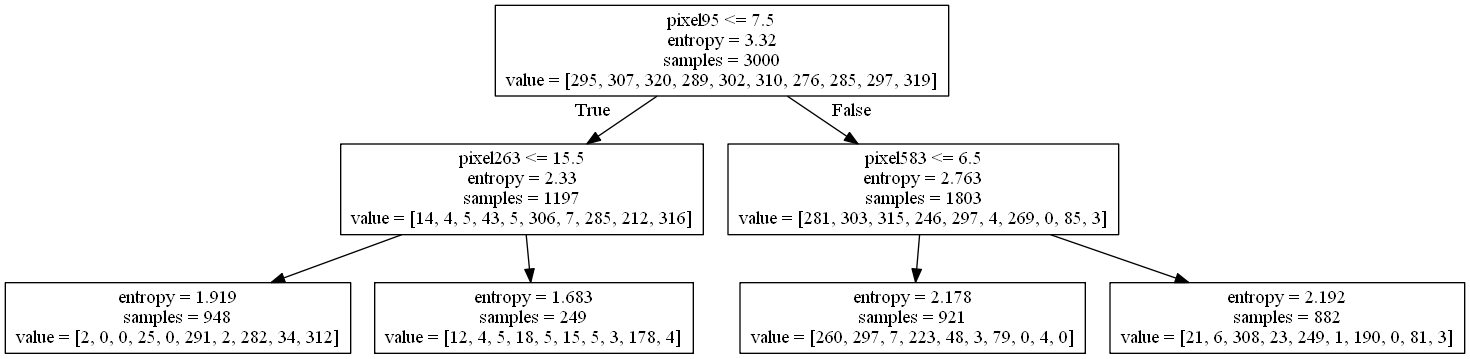

In [18]:
# visualise the decision tree
feature_names = list(X_train.columns)
visualize_tree(my_tree, feature_names, fileName="dt_under.png")
Image(filename='dt_under.png') 

## Perform a Cross Validation Experiment

Use a cross validation to perfrom an evaluation

In [19]:
my_tree = tree.DecisionTreeClassifier(max_depth = 12)
scores = cross_val_score(my_tree, X_train_plus_valid, y_train_plus_valid, cv=10)
print(scores)
scores = pd.Series(scores)
print(scores.mean(), " =/- ", scores.std())

[0.72576832 0.74940898 0.75177305 0.72748815 0.73634204 0.74761905
 0.77088305 0.72009569 0.74820144 0.70289855]
0.7380478334889153  =/-  0.019474391472729446


### Choosing Parameters Using a Grid Search

In [20]:
my_tree.fit(X_train_plus_valid, y_train_plus_valid)
my_tree.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

An alternative to using post pruning explicitly is to use a grid search through a large set of possible parameters. Here we try depths between 3 and 20 and different limits on the minimum number of samples per split.

In [21]:
# Set up the parameter grid to seaerch
param_grid ={'criterion': ['gini', "entropy"], \
             'max_depth': list(range(3, 20, 3)), \
             'min_samples_split': [50] }

# Perform the search
my_tuned_tree = GridSearchCV(tree.DecisionTreeClassifier(), \
                                param_grid, cv=2, verbose = 0, \
                            return_train_score=True)
my_tuned_tree.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
display(my_tuned_tree.best_params_)
display(my_tuned_tree.best_score_)
display(my_tuned_tree.cv_results_)

Best parameters set found on development set:


{'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 50}

0.709047619047619

{'mean_fit_time': array([0.15375364, 0.31240618, 0.39055669, 0.45301533, 0.47645569,
        0.48429823, 0.29680622, 0.58578897, 0.78889513, 0.81232762,
        0.82342362, 0.85918844]),
 'std_fit_time': array([1.31446123e-02, 2.20537186e-05, 1.56282187e-02, 4.10079956e-05,
        7.80916214e-03, 1.66893005e-05, 3.96966934e-05, 2.34045982e-02,
        3.90365124e-02, 4.68826294e-02, 2.01795101e-02, 1.56458616e-02]),
 'mean_score_time': array([0.00781083, 0.        , 0.00781155, 0.00781178, 0.00780916,
        0.        , 0.        , 0.00781119, 0.        , 0.        ,
        0.        , 0.01560307]),
 'std_score_time': array([7.81083107e-03, 0.00000000e+00, 7.81154633e-03, 7.81178474e-03,
        7.80916214e-03, 0.00000000e+00, 0.00000000e+00, 7.81118870e-03,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.95503235e-05]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', 'gini', 'gini', 'gini',
                    'entropy', 'entropy', 'entropy', 'entropy', 'en

In [22]:
my_dict = {'DecTree':0, 'RandomForest':0, 'Bagging':0,'AdaBoost':0, 'LogReg':0,'NN':0 , 'XGBoost':0}

In [23]:
# Make a set of predictions for the test data
y_pred = my_tuned_tree.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.7338888888888889
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       187
           1       0.91      0.91      0.91       176
           2       0.58      0.61      0.60       182
           3       0.78      0.77      0.78       207
           4       0.53      0.60      0.56       161
           5       0.80      0.77      0.79       166
           6       0.55      0.44      0.49       176
           7       0.79      0.72      0.75       168
           8       0.79      0.87      0.83       195
           9       0.84      0.88      0.86       182

    accuracy                           0.73      1800
   macro avg       0.73      0.73      0.73      1800
weighted avg       0.73      0.73      0.73      1800

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,139,6,4,13,7,0,14,0,4,0,187
1,2,160,3,9,2,0,0,0,0,0,176
2,4,0,111,6,31,0,27,0,3,0,182
3,11,6,3,160,14,1,5,1,6,0,207
4,0,1,42,3,96,0,11,0,8,0,161
5,0,0,0,2,1,128,0,15,14,6,166
6,35,1,20,10,28,0,77,0,5,0,176
7,0,0,0,1,0,23,0,121,2,21,168
8,2,1,8,0,2,3,5,2,169,3,195


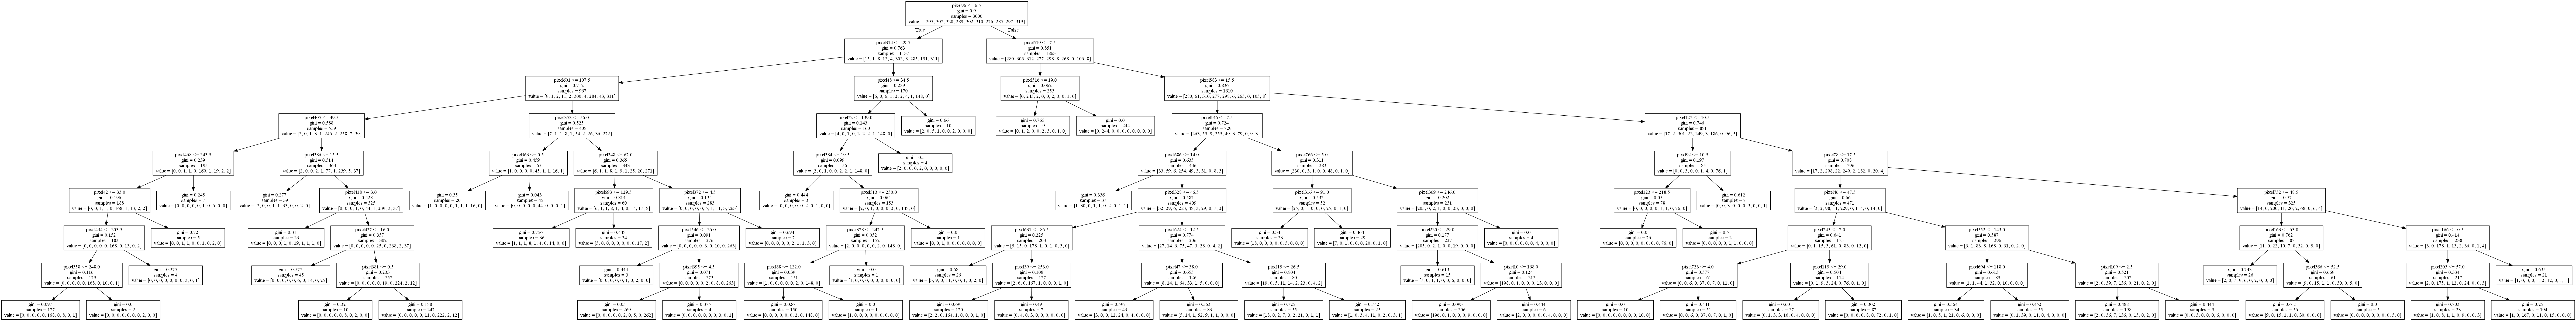

In [24]:
best_tree = tree.DecisionTreeClassifier(min_samples_split=50, criterion='gini', max_depth=8)
best_tree = best_tree.fit(X_train, y_train)

# visualise the decision tree
feature_names = list(X_train.columns)
visualize_tree(best_tree, feature_names, 'dt_tuned.png')
Image(filename='dt_tuned.png') 

### Final Evaluation on Test Set

Evaluate the model on a stratified test set

In [25]:
# Make a set of predictions for the test data
y_pred = my_tuned_tree.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: " +  str(accuracy))
# Print performance details
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Accuracy: 0.7338888888888889
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       187
           1       0.91      0.91      0.91       176
           2       0.58      0.61      0.60       182
           3       0.78      0.77      0.78       207
           4       0.53      0.60      0.56       161
           5       0.80      0.77      0.79       166
           6       0.55      0.44      0.49       176
           7       0.79      0.72      0.75       168
           8       0.79      0.87      0.83       195
           9       0.84      0.88      0.86       182

    accuracy                           0.73      1800
   macro avg       0.73      0.73      0.73      1800
weighted avg       0.73      0.73      0.73      1800

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,139,6,4,13,7,0,14,0,4,0,187
1,2,160,3,9,2,0,0,0,0,0,176
2,4,0,111,6,31,0,27,0,3,0,182
3,11,6,3,160,14,1,5,1,6,0,207
4,0,1,42,3,96,0,11,0,8,0,161
5,0,0,0,2,1,128,0,15,14,6,166
6,35,1,20,10,28,0,77,0,5,0,176
7,0,0,0,1,0,23,0,121,2,21,168
8,2,1,8,0,2,3,5,2,169,3,195


In [26]:
my_dict['DecTree'] = accuracy
print(my_dict)

{'DecTree': 0.7338888888888889, 'RandomForest': 0, 'Bagging': 0, 'AdaBoost': 0, 'LogReg': 0, 'NN': 0, 'XGBoost': 0}


### Other Models

We can easily use the same patterns to train other types of models.

#### RANDOM FOREST

In [27]:
# Do the same job with random forests
my_forest = ensemble.RandomForestClassifier(n_estimators=300, \
                                           max_features = 3,\
                                           min_samples_split=200)
my_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=200,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Model Before Best Params for Random Forest on Validation Set

In [28]:
# Make a set of predictions for the test data
y_pred = my_forest.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.70      0.78      0.73       121
           1       0.93      0.94      0.94       117
           2       0.52      0.70      0.59       115
           3       0.74      0.84      0.79       120
           4       0.57      0.64      0.60       135
           5       0.88      0.74      0.81       113
           6       0.86      0.20      0.33       122
           7       0.87      0.90      0.88       125
           8       0.92      0.94      0.93       122
           9       0.83      0.96      0.89       110

    accuracy                           0.76      1200
   macro avg       0.78      0.76      0.75      1200
weighted avg       0.78      0.76      0.75      1200

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,94,2,5,14,1,1,1,0,3,0,121
1,3,110,1,3,0,0,0,0,0,0,117
2,1,0,80,0,30,0,1,0,3,0,115
3,7,4,2,101,6,0,0,0,0,0,120
4,1,2,32,11,86,0,2,0,1,0,135
5,0,0,0,0,0,84,0,15,0,14,113
6,28,0,34,6,26,0,25,0,3,0,122
7,0,0,0,0,0,5,0,112,0,8,125
8,1,0,1,1,1,3,0,0,115,0,122


## Choosing Parameters Using a Grid Search for Random Forest

In [29]:
# Set up the parameter grid to seaerch
random_grid = {'n_estimators': [200,2000,10],
               'max_features': ['auto', 'sqrt'],
               'min_samples_split': [2, 5, 10]
               }
# Perform the search
my_tuned_forest = GridSearchCV(ensemble.RandomForestClassifier(), \
                                random_grid, cv=2, verbose = 0, \
                            return_train_score=True)
my_tuned_forest.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
display(my_tuned_forest.best_params_)
display(my_tuned_forest.best_score_)
display(my_tuned_forest.cv_results_)

Best parameters set found on development set:


{'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 2000}

0.8364285714285714

{'mean_fit_time': array([ 3.01388717, 31.39499342,  0.17156947,  3.01724958, 29.54123795,
         0.16775906,  2.90976822, 28.32731879,  0.15620315,  3.01493526,
        30.31685388,  0.17850769,  3.01337111, 29.73518384,  0.15622413,
         2.85089517, 29.05139244,  0.15256417]),
 'std_fit_time': array([1.39570713e-01, 1.63763762e-02, 1.76966190e-03, 5.56159019e-03,
        3.06761265e-03, 6.11603260e-03, 6.66784048e-02, 6.83149099e-02,
        1.25169754e-05, 1.56390667e-02, 2.92976499e-01, 5.33688068e-03,
        6.05202913e-02, 4.76451755e-01, 2.37226486e-05, 7.83157349e-03,
        6.21857524e-01, 7.94053078e-04]),
 'mean_score_time': array([0.07811129, 1.03613579, 0.00498629, 0.07186043, 0.69268167,
        0.00616157, 0.07028711, 0.65607989, 0.00780892, 0.07810688,
        0.91402912, 0.01012635, 0.07191777, 0.67950618, 0.00780404,
        0.07811093, 0.64546943, 0.00917077]),
 'std_score_time': array([4.88758087e-06, 2.80417204e-02, 4.98628616e-03, 6.23404980e-03,
        2.

#### Assessing test set

In [30]:
# Make a set of predictions for the test data
y_pred = my_tuned_forest.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

my_dict['RandomForest'] = accuracy
print(my_dict)

Accuracy: 0.8477777777777777
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       187
           1       0.99      0.94      0.97       176
           2       0.74      0.79      0.76       182
           3       0.89      0.90      0.90       207
           4       0.69      0.78      0.73       161
           5       0.93      0.91      0.92       166
           6       0.67      0.51      0.58       176
           7       0.87      0.86      0.86       168
           8       0.97      0.96      0.97       195
           9       0.91      0.94      0.92       182

    accuracy                           0.85      1800
   macro avg       0.85      0.85      0.84      1800
weighted avg       0.85      0.85      0.85      1800

Confusion Matrix
{'DecTree': 0.7338888888888889, 'RandomForest': 0.8477777777777777, 'Bagging': 0, 'AdaBoost': 0, 'LogReg': 0, 'NN': 0, 'XGBoost': 0}


#### BAGGING

In [31]:
# Do the same job with random forests
my_bag = ensemble.BaggingClassifier(base_estimator = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 50), \
                                      n_estimators=10)
my_bag.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None,
                                                        criterion='entropy',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=50,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort=False,
                                                        random_state=None,
                                                        splitter='best'),


#### Model Before Best Params for Bagging on Validation Set

In [32]:
# Make a set of predictions for the test data
y_pred = my_bag.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       121
           1       0.94      0.88      0.91       117
           2       0.59      0.57      0.58       115
           3       0.72      0.81      0.76       120
           4       0.59      0.78      0.67       135
           5       0.78      0.78      0.78       113
           6       0.64      0.34      0.45       122
           7       0.87      0.82      0.85       125
           8       0.81      0.89      0.85       122
           9       0.82      0.90      0.86       110

    accuracy                           0.75      1200
   macro avg       0.75      0.75      0.75      1200
weighted avg       0.75      0.75      0.74      1200

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,88,2,4,13,1,1,7,0,5,0,121
1,1,103,2,6,2,2,0,0,1,0,117
2,2,0,66,0,41,0,3,0,3,0,115
3,3,2,4,97,4,3,4,0,3,0,120
4,1,1,10,8,105,0,8,0,2,0,135
5,0,0,1,0,0,88,0,9,3,12,113
6,19,1,21,8,25,0,42,0,6,0,122
7,0,0,0,0,0,11,0,103,2,9,125
8,0,0,4,3,1,3,2,0,109,0,122


## Choosing Parameters Using a Grid Search for Bagging

In [33]:
# Set up the parameter grid to seaerch
bag_grid = {'n_estimators': list(range(10,50,5))
           }


# Perform the search
my_tuned_bag = GridSearchCV(ensemble.BaggingClassifier(), \
                                bag_grid, cv=5, verbose = 0, \
                            return_train_score=True)
my_tuned_bag.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
display(my_tuned_bag.best_params_)
display(my_tuned_bag.best_score_)
display(my_tuned_bag.cv_results_)

Best parameters set found on development set:


{'n_estimators': 40}

0.8297619047619048

{'mean_fit_time': array([ 6.83346853, 10.10018535, 13.40943775, 16.79811482, 21.04466696,
        22.8599287 , 27.54770265, 29.17360873]),
 'std_fit_time': array([0.17826102, 0.16160321, 0.2183232 , 0.25160781, 0.79305265,
        0.32919211, 1.5367179 , 1.00807725]),
 'mean_score_time': array([0.04543266, 0.05935383, 0.07556252, 0.09333935, 0.12185502,
        0.13258862, 0.15783119, 0.16046   ]),
 'std_score_time': array([0.00249359, 0.00625438, 0.00662436, 0.00072854, 0.02296943,
        0.00699926, 0.01377491, 0.0060914 ]),
 'param_n_estimators': masked_array(data=[10, 15, 20, 25, 30, 35, 40, 45],
              mask=[False, False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 15},
  {'n_estimators': 20},
  {'n_estimators': 25},
  {'n_estimators': 30},
  {'n_estimators': 35},
  {'n_estimators': 40},
  {'n_estimators': 45}],
 'split0_test_score': array([0.81376038, 0.83036773, 0.8374

#### Assessing Validation set

In [34]:
# Make a set of predictions for the test data
y_pred = my_tuned_bag.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00       115
           3       1.00      1.00      1.00       120
           4       1.00      1.00      1.00       135
           5       1.00      1.00      1.00       113
           6       1.00      1.00      1.00       122
           7       1.00      1.00      1.00       125
           8       1.00      1.00      1.00       122
           9       1.00      1.00      1.00       110

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,121,0,0,0,0,0,0,0,0,0,121
1,0,117,0,0,0,0,0,0,0,0,117
2,0,0,115,0,0,0,0,0,0,0,115
3,0,0,0,120,0,0,0,0,0,0,120
4,0,0,0,0,135,0,0,0,0,0,135
5,0,0,0,0,0,113,0,0,0,0,113
6,0,0,0,0,0,0,122,0,0,0,122
7,0,0,0,0,0,0,0,125,0,0,125
8,0,0,0,0,0,0,0,0,122,0,122


#### Assessing test set

In [35]:
# Make a set of predictions for the test data
y_pred = my_tuned_bag.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

my_dict['Bagging'] = accuracy
print(my_dict)

Accuracy: 0.8272222222222222
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       187
           1       0.97      0.94      0.95       176
           2       0.75      0.78      0.77       182
           3       0.86      0.86      0.86       207
           4       0.65      0.78      0.71       161
           5       0.91      0.90      0.90       166
           6       0.61      0.45      0.52       176
           7       0.85      0.82      0.84       168
           8       0.96      0.95      0.95       195
           9       0.89      0.93      0.91       182

    accuracy                           0.83      1800
   macro avg       0.82      0.82      0.82      1800
weighted avg       0.83      0.83      0.82      1800

Confusion Matrix
{'DecTree': 0.7338888888888889, 'RandomForest': 0.8477777777777777, 'Bagging': 0.8272222222222222, 'AdaBoost': 0, 'LogReg': 0, 'NN': 0, 'XGBoost': 0}


### Ada Boost

In [53]:
# Do the same job with random forests
my_ada = ensemble.AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(criterion="entropy", min_samples_leaf = 50), \
                                       n_estimators=10)
my_ada.fit(X_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=50,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                      

#### Model Before Best Params for Ada Boost on Validation Set

In [55]:
# Make a set of predictions for the test data
y_pred = my_ada.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.74      0.55      0.63       121
           1       0.97      0.91      0.94       117
           2       0.44      0.51      0.47       115
           3       0.80      0.75      0.78       120
           4       0.61      0.49      0.54       135
           5       0.75      0.89      0.82       113
           6       0.32      0.49      0.39       122
           7       0.82      0.70      0.76       125
           8       0.95      0.87      0.91       122
           9       0.88      0.86      0.87       110

    accuracy                           0.70      1200
   macro avg       0.73      0.70      0.71      1200
weighted avg       0.73      0.70      0.71      1200

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,66,1,3,9,2,0,38,0,2,0,121
1,1,106,0,6,2,0,2,0,0,0,117
2,1,0,59,0,16,0,38,0,1,0,115
3,7,2,1,90,9,0,11,0,0,0,120
4,1,0,35,3,66,0,30,0,0,0,135
5,0,0,0,0,0,101,0,8,1,3,113
6,13,0,34,3,12,0,60,0,0,0,122
7,0,0,0,0,0,27,0,88,1,9,125
8,0,0,2,1,1,1,9,1,106,1,122


## Choosing Parameters Using a Grid Search for Ada Boost

In [57]:
# Set up the parameter grid to seaerch
boost_grid = {'n_estimators': list(range(10,200,10))}

# Perform the search
my_tuned_boost = GridSearchCV(ensemble.AdaBoostClassifier(), \
                                boost_grid, cv=5, verbose = 0, \
                            return_train_score=True)
my_tuned_boost.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
display(my_tuned_boost.best_params_)
display(my_tuned_boost.best_score_)
display(my_tuned_boost.cv_results_)

C:\AnacondaHome\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best parameters set found on development set:


{'n_estimators': 10}

0.3597619047619048

{'mean_fit_time': array([ 2.34267464,  4.80218019,  7.05557799,  9.53889966, 11.85618339,
        14.34883113, 16.48635535, 18.65789452, 21.07306414, 23.43998947,
        25.38123727, 27.85151029, 30.51261411, 29.37839146, 32.98505878,
        35.00579519, 37.20314889, 39.33741736, 41.49195256]),
 'std_fit_time': array([0.0078766 , 0.16952821, 0.08724381, 0.16699934, 0.14725562,
        0.18696139, 0.09229002, 0.24592236, 0.23962627, 0.47009832,
        0.47685509, 0.57469752, 0.46585037, 0.77793374, 0.85312061,
        0.22330073, 0.50341537, 0.35731194, 0.48819976]),
 'mean_score_time': array([0.05371933, 0.10041099, 0.15060902, 0.18496127, 0.2505898 ,
        0.28573523, 0.35501189, 0.39632854, 0.45811563, 0.48662601,
        0.524158  , 0.58870845, 0.69482894, 0.66170306, 0.68459711,
        0.76078248, 0.79499135, 0.84320221, 0.88523335]),
 'std_score_time': array([0.00839605, 0.00643772, 0.01659224, 0.00441648, 0.01445685,
        0.00658233, 0.02630678, 0.02909845, 0.02248452, 0

#### Assessing Validation set

In [58]:
# Make a set of predictions for the test data
y_pred = my_tuned_boost.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.42      0.93      0.58       117
           2       0.33      0.16      0.21       115
           3       0.31      0.09      0.14       120
           4       0.25      0.73      0.37       135
           5       0.64      0.16      0.26       113
           6       0.00      0.00      0.00       122
           7       0.43      0.67      0.52       125
           8       0.72      0.63      0.67       122
           9       0.36      0.41      0.38       110

    accuracy                           0.38      1200
   macro avg       0.35      0.38      0.31      1200
weighted avg       0.34      0.38      0.31      1200

Confusion Matrix


C:\AnacondaHome\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Predicted,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,
0,18,7,4,89,0,0,0,3,0,121
1,109,0,3,4,0,0,0,1,0,117
2,5,18,0,89,0,1,0,2,0,115
3,86,2,11,18,0,0,0,3,0,120
4,29,7,0,98,0,0,0,1,0,135
5,0,0,0,0,18,0,51,10,34,113
6,9,14,0,92,0,0,0,7,0,122
7,0,0,0,0,3,0,84,0,38,125
8,3,7,17,2,1,0,6,77,9,122


#### Assessing test set

In [59]:
# Make a set of predictions for the test data
y_pred = my_tuned_boost.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

my_dict['AdaBoost'] = accuracy
print(my_dict)

Accuracy: 0.38055555555555554
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       187
           1       0.40      0.93      0.56       176
           2       0.33      0.17      0.22       182
           3       0.41      0.09      0.15       207
           4       0.19      0.67      0.30       161
           5       0.61      0.15      0.24       166
           6       0.00      0.00      0.00       176
           7       0.41      0.65      0.50       168
           8       0.79      0.69      0.74       195
           9       0.44      0.52      0.48       182

    accuracy                           0.38      1800
   macro avg       0.36      0.39      0.32      1800
weighted avg       0.36      0.38      0.32      1800

Confusion Matrix
{'DecTree': 0.7338888888888889, 'RandomForest': 0.8477777777777777, 'Bagging': 0.8272222222222222, 'AdaBoost': 0.38055555555555554, 'LogReg': 0.7394444444444445, 'NN': 0, 'XGBoost': 0}


C:\AnacondaHome\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### LOGISTIC REGRESSION

In [39]:
# Do the same job with logistic regression
my_log_model = linear_model.LogisticRegression()
my_log_model.fit(X_train,y_train)

C:\AnacondaHome\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\AnacondaHome\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Model Before Best Params for Logistic Regression on Validation Set

In [40]:
# Make a set of predictions for the test data
y_pred = my_log_model.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.70      0.64      0.67       121
           1       0.96      0.95      0.95       117
           2       0.49      0.63      0.55       115
           3       0.75      0.71      0.73       120
           4       0.59      0.57      0.58       135
           5       0.88      0.81      0.84       113
           6       0.43      0.48      0.46       122
           7       0.90      0.89      0.89       125
           8       0.93      0.78      0.85       122
           9       0.87      0.92      0.89       110

    accuracy                           0.73      1200
   macro avg       0.75      0.74      0.74      1200
weighted avg       0.75      0.73      0.74      1200

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,77,1,9,10,1,0,23,0,0,0,121
1,1,111,2,3,0,0,0,0,0,0,117
2,4,0,72,0,23,0,12,0,3,1,115
3,8,2,5,85,10,0,9,0,1,0,120
4,2,1,27,10,77,0,18,0,0,0,135
5,0,0,1,1,2,91,0,10,0,8,113
6,17,1,25,3,14,0,59,0,3,0,122
7,0,0,0,0,1,7,0,111,0,6,125
8,1,0,6,2,3,1,14,0,95,0,122


## Choosing Parameters Using a Grid Search for Logistic Regression

In [41]:
# Set up the parameter grid to seaerch
log_grid = {'multi_class': ['ovr'],
            'solver' : ['liblinear'],
            'max_iter' : list(range(100,1000,100))
           }

# Perform the search
my_tuned_logreg = GridSearchCV(linear_model.LogisticRegression(), \
                                log_grid, cv=5, verbose = 0, \
                            return_train_score=True)
my_tuned_logreg.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
display(my_tuned_logreg.best_params_)
display(my_tuned_logreg.best_score_)
display(my_tuned_logreg.cv_results_)

Best parameters set found on development set:


{'max_iter': 100, 'multi_class': 'ovr', 'solver': 'liblinear'}

0.7414285714285714

{'mean_fit_time': array([14.25929565, 13.41814122, 13.42366796, 14.29950829, 13.84084668,
        13.26073608, 13.09525862, 13.10461531, 13.55852585]),
 'std_fit_time': array([0.79189743, 0.18860209, 0.18903626, 0.66759763, 0.13146383,
        0.3422684 , 0.23588645, 0.20510598, 0.43642817]),
 'mean_score_time': array([0.00785108, 0.00447683, 0.00363798, 0.00365438, 0.00365071,
        0.00608726, 0.00407853, 0.00243545, 0.00202336]),
 'std_score_time': array([0.00697441, 0.00391758, 0.00450329, 0.00369151, 0.00452168,
        0.00334901, 0.00495529, 0.00295758, 0.00312662]),
 'param_max_iter': masked_array(data=[100, 200, 300, 400, 500, 600, 700, 800, 900],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_multi_class': masked_array(data=['ovr', 'ovr', 'ovr', 'ovr', 'ovr', 'ovr', 'ovr', 'ovr',
                    'ovr'],
              mask=[False, False, False, False, Fals

#### Assessing Validation set

In [42]:
# Make a set of predictions for the test data
y_pred = my_tuned_logreg.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       121
           1       1.00      1.00      1.00       117
           2       1.00      1.00      1.00       115
           3       1.00      1.00      1.00       120
           4       1.00      1.00      1.00       135
           5       1.00      1.00      1.00       113
           6       1.00      1.00      1.00       122
           7       1.00      1.00      1.00       125
           8       1.00      1.00      1.00       122
           9       1.00      1.00      1.00       110

    accuracy                           1.00      1200
   macro avg       1.00      1.00      1.00      1200
weighted avg       1.00      1.00      1.00      1200

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,121,0,0,0,0,0,0,0,0,0,121
1,0,117,0,0,0,0,0,0,0,0,117
2,0,0,115,0,0,0,0,0,0,0,115
3,0,0,0,120,0,0,0,0,0,0,120
4,0,0,0,0,135,0,0,0,0,0,135
5,0,0,0,0,0,113,0,0,0,0,113
6,0,0,0,0,0,0,122,0,0,0,122
7,0,0,0,0,0,0,0,125,0,0,125
8,0,0,0,0,0,0,0,0,122,0,122


#### Assessing test set

In [43]:
# Make a set of predictions for the test data
y_pred = my_tuned_logreg.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

my_dict['LogReg'] = accuracy
print(my_dict)

Accuracy: 0.7394444444444445
              precision    recall  f1-score   support

           0       0.69      0.65      0.67       187
           1       0.91      0.93      0.92       176
           2       0.57      0.67      0.62       182
           3       0.82      0.72      0.77       207
           4       0.54      0.66      0.60       161
           5       0.88      0.77      0.82       166
           6       0.40      0.41      0.41       176
           7       0.89      0.86      0.88       168
           8       0.91      0.83      0.87       195
           9       0.87      0.88      0.87       182

    accuracy                           0.74      1800
   macro avg       0.75      0.74      0.74      1800
weighted avg       0.75      0.74      0.74      1800

Confusion Matrix
{'DecTree': 0.7338888888888889, 'RandomForest': 0.8477777777777777, 'Bagging': 0.8272222222222222, 'AdaBoost': 0, 'LogReg': 0.7394444444444445, 'NN': 0, 'XGBoost': 0}


### NEAREST NEIGHBORS

In [44]:
# Do the same job with random forests
my_nn = neighbors.KNeighborsClassifier()
my_nn = my_nn.fit(X_train,y_train)

#### Model Before Best Params for Nearest Neighbors on Validation Set

In [45]:
# Make a set of predictions for the test data
y_pred = my_nn.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.72      0.81      0.76       121
           1       0.96      0.92      0.94       117
           2       0.61      0.69      0.65       115
           3       0.82      0.78      0.80       120
           4       0.67      0.64      0.65       135
           5       0.98      0.74      0.84       113
           6       0.51      0.51      0.51       122
           7       0.85      0.94      0.89       125
           8       0.98      0.89      0.93       122
           9       0.85      0.95      0.90       110

    accuracy                           0.78      1200
   macro avg       0.79      0.79      0.79      1200
weighted avg       0.79      0.78      0.79      1200

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,98,1,5,3,1,0,13,0,0,0,121
1,2,108,1,6,0,0,0,0,0,0,117
2,2,1,79,0,16,0,15,0,2,0,115
3,8,2,0,94,11,0,5,0,0,0,120
4,1,0,24,7,86,0,17,0,0,0,135
5,1,0,0,0,0,84,1,16,0,11,113
6,24,0,18,4,14,0,62,0,0,0,122
7,0,0,0,0,0,1,0,117,0,7,125
8,0,1,2,0,1,0,9,1,108,0,122


## Choosing Parameters Using a Grid Search for Nearest Neighbor

In [60]:
# Set up the parameter grid to search
nn_grid = {'n_neighbors':[10,50,100]}

# Perform the search
my_tuned_nn = GridSearchCV(neighbors.KNeighborsClassifier(), \
                                nn_grid, cv=5, verbose = 0, \
                            return_train_score=True)
my_tuned_nn.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
display(my_tuned_nn.best_params_)
display(my_tuned_nn.best_score_)
display(my_tuned_nn.cv_results_)

Best parameters set found on development set:


{'n_neighbors': 10}

0.7973809523809524

{'mean_fit_time': array([0.12624454, 0.23556814, 0.23808203]),
 'std_fit_time': array([0.05719955, 0.00439984, 0.0069147 ]),
 'mean_score_time': array([4.18835897, 8.18410983, 8.24946742]),
 'std_score_time': array([1.98232922, 0.02735921, 0.01287727]),
 'param_n_neighbors': masked_array(data=[10, 50, 100],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 10}, {'n_neighbors': 50}, {'n_neighbors': 100}],
 'split0_test_score': array([0.8054567 , 0.75800712, 0.74970344]),
 'split1_test_score': array([0.80285036, 0.76128266, 0.74346793]),
 'split2_test_score': array([0.81926278, 0.79310345, 0.7705113 ]),
 'split3_test_score': array([0.77592372, 0.74135876, 0.71990465]),
 'split4_test_score': array([0.78323353, 0.75688623, 0.73772455]),
 'mean_test_score': array([0.79738095, 0.76214286, 0.74428571]),
 'std_test_score': array([0.0157076 , 0.01695015, 0.01646359]),
 'rank_test_score': array([1, 2, 3]),
 'split0_train_sco

#### Assessing Validation set

In [61]:
# Make a set of predictions for the test data
y_pred = my_tuned_nn.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       121
           1       0.96      0.94      0.95       117
           2       0.71      0.77      0.74       115
           3       0.88      0.82      0.85       120
           4       0.73      0.71      0.72       135
           5       1.00      0.77      0.87       113
           6       0.60      0.56      0.58       122
           7       0.85      0.98      0.91       125
           8       0.97      0.91      0.94       122
           9       0.90      0.95      0.92       110

    accuracy                           0.83      1200
   macro avg       0.84      0.83      0.83      1200
weighted avg       0.83      0.83      0.83      1200

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,109,1,5,2,0,0,4,0,0,0,121
1,3,110,1,3,0,0,0,0,0,0,117
2,1,1,88,0,14,0,9,0,2,0,115
3,7,1,0,99,7,0,5,0,1,0,120
4,0,0,12,6,96,0,21,0,0,0,135
5,2,0,0,0,0,87,1,15,0,8,113
6,22,0,16,2,14,0,68,0,0,0,122
7,0,0,0,0,0,0,0,122,0,3,125
8,0,1,2,1,1,0,5,1,111,0,122


#### Assessing test set

In [62]:
# Make a set of predictions for the test data
y_pred = my_tuned_nn.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

my_dict['NN'] = accuracy
print(my_dict)

Accuracy: 0.8055555555555556
              precision    recall  f1-score   support

           0       0.71      0.90      0.80       187
           1       0.98      0.93      0.95       176
           2       0.65      0.74      0.69       182
           3       0.90      0.86      0.88       207
           4       0.64      0.62      0.63       161
           5       1.00      0.72      0.84       166
           6       0.60      0.48      0.53       176
           7       0.77      0.93      0.84       168
           8       0.99      0.89      0.94       195
           9       0.87      0.95      0.91       182

    accuracy                           0.81      1800
   macro avg       0.81      0.80      0.80      1800
weighted avg       0.81      0.81      0.80      1800

Confusion Matrix
{'DecTree': 0.7338888888888889, 'RandomForest': 0.8477777777777777, 'Bagging': 0.8272222222222222, 'AdaBoost': 0.38055555555555554, 'LogReg': 0.7394444444444445, 'NN': 0.8055555555555556, 'XGBoos

### XG BOOST

In [63]:
# Do the same job with random forests
my_xgboost = XGBClassifier()
my_xgboost = my_xgboost.fit(X_train,y_train)

#### Model Before Best Params for XG Boost on Validation Set

In [64]:
# Make a set of predictions for the test data
y_pred = my_xgboost.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       121
           1       1.00      0.95      0.97       117
           2       0.71      0.73      0.72       115
           3       0.88      0.88      0.88       120
           4       0.68      0.76      0.71       135
           5       0.92      0.91      0.92       113
           6       0.58      0.52      0.55       122
           7       0.91      0.94      0.92       125
           8       0.94      0.95      0.94       122
           9       0.94      0.93      0.93       110

    accuracy                           0.83      1200
   macro avg       0.83      0.83      0.83      1200
weighted avg       0.83      0.83      0.83      1200

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,92,0,3,6,0,0,18,0,2,0,121
1,0,111,1,2,1,0,2,0,0,0,117
2,1,0,84,0,20,0,8,0,2,0,115
3,5,0,2,105,5,0,3,0,0,0,120
4,0,0,17,4,102,0,12,0,0,0,135
5,0,0,0,0,0,103,0,5,1,4,113
6,20,0,12,2,22,0,63,0,3,0,122
7,0,0,0,0,0,5,0,117,0,3,125
8,0,0,0,1,1,2,2,0,116,0,122


## Choosing Parameters Using a Grid Search for XG Boost

In [65]:
# Set up the parameter grid to search
xg_grid = {'eta': list(range(0,1)), 'gamma': list(range(1,10))
        }

# Perform the search
my_tuned_xg = GridSearchCV(XGBClassifier(), \
                                xg_grid, cv=5, verbose = 0, \
                            return_train_score=True)
my_tuned_xg.fit(X_train_plus_valid, y_train_plus_valid)

# Print details
print("Best parameters set found on development set:")
display(my_tuned_xg.best_params_)
display(my_tuned_xg.best_score_)
display(my_tuned_xg.cv_results_)

Best parameters set found on development set:


{'eta': 0, 'gamma': 1}

0.84

{'mean_fit_time': array([  92.85407743,   89.43386636,  107.79014201,   84.02632656,
          85.09608245,   84.75808678,   84.67432256,   83.96928492,
        2261.48979297]),
 'std_fit_time': array([2.28681363e+00, 2.77368597e+00, 2.86588964e+01, 3.69874508e-01,
        8.80383159e-01, 3.97897245e-01, 4.56711316e-01, 1.94426894e-01,
        4.35437004e+03]),
 'mean_score_time': array([0.10934873, 0.11246624, 0.13515296, 0.09684997, 0.10310035,
        0.09685488, 0.09893165, 0.09371362, 0.0937254 ]),
 'std_score_time': array([1.32660177e-06, 1.16825294e-02, 6.76055400e-02, 6.25191051e-03,
        7.65204737e-03, 6.25624675e-03, 6.58296705e-03, 2.72593253e-05,
        2.25378080e-06]),
 'param_eta': masked_array(data=[0, 0, 0, 0, 0, 0, 0, 0, 0],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9],
              mask=[Fal

#### Assessing Validation set

In [66]:
# Make a set of predictions for the test data
y_pred = my_tuned_xg.predict(X_valid)

# Print performance details
print(metrics.classification_report(y_valid, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_valid, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       121
           1       1.00      0.99      1.00       117
           2       0.94      0.89      0.91       115
           3       0.97      0.95      0.96       120
           4       0.89      0.95      0.92       135
           5       1.00      1.00      1.00       113
           6       0.92      0.89      0.90       122
           7       1.00      1.00      1.00       125
           8       0.99      1.00      1.00       122
           9       1.00      1.00      1.00       110

    accuracy                           0.97      1200
   macro avg       0.97      0.97      0.97      1200
weighted avg       0.97      0.97      0.97      1200

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,121,0,0,0,0,0,0,0,0,0,121
1,0,116,0,1,0,0,0,0,0,0,117
2,1,0,102,0,9,0,2,0,1,0,115
3,0,0,1,114,2,0,3,0,0,0,120
4,0,0,1,1,128,0,5,0,0,0,135
5,0,0,0,0,0,113,0,0,0,0,113
6,4,0,4,1,5,0,108,0,0,0,122
7,0,0,0,0,0,0,0,125,0,0,125
8,0,0,0,0,0,0,0,0,122,0,122


#### Assessing test set

In [67]:
# Make a set of predictions for the test data
y_pred = my_tuned_xg.predict(X_test)

# Print performance details
accuracy = metrics.accuracy_score(y_test, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

my_dict['XGBoost'] = accuracy
print(my_dict)

Accuracy: 0.8422222222222222
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       187
           1       0.98      0.96      0.97       176
           2       0.77      0.77      0.77       182
           3       0.90      0.89      0.89       207
           4       0.70      0.78      0.74       161
           5       0.94      0.89      0.91       166
           6       0.59      0.52      0.55       176
           7       0.86      0.89      0.87       168
           8       0.98      0.93      0.96       195
           9       0.90      0.92      0.91       182

    accuracy                           0.84      1800
   macro avg       0.84      0.84      0.84      1800
weighted avg       0.84      0.84      0.84      1800

Confusion Matrix
{'DecTree': 0.7338888888888889, 'RandomForest': 0.8477777777777777, 'Bagging': 0.8272222222222222, 'AdaBoost': 0.38055555555555554, 'LogReg': 0.7394444444444445, 'NN': 0.8055555555555556, 'XGBoos

### From the accuracy, it is infered that XGBoost is best model.

In [74]:
print(my_dict)

{'DecTree': 0.7338888888888889, 'RandomForest': 0.8477777777777777, 'Bagging': 0.8272222222222222, 'AdaBoost': 0.38055555555555554, 'LogReg': 0.7394444444444445, 'NN': 0.8055555555555556, 'XGBoost': 0.8422222222222222}


### Assessing the TEST DATASET

In [69]:
dframe_test = pd.read_csv(r"D:\Semester2\AML\Lab1\fashionmnist\fashion-mnist_test.csv")
dframe_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
data_sampling_rate = 0.1
dframe_test = dframe_test.sample(frac = data_sampling_rate)

In [71]:
X = dframe_test.iloc[:,1:]
Y = np.array(dframe_test["label"])

In [72]:
X = X/255

In [73]:
best_model = linear_model.LogisticRegression(C=0.4,max_iter = 1000,multi_class='ovr',solver='liblinear')
best_model = best_model.fit(X,Y)

# Make a set of predictions for the test data
y_pred = best_model.predict(X)

# Print performance details
accuracy = metrics.accuracy_score(Y, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(Y, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(Y), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Accuracy: 0.952
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       104
           1       1.00      0.98      0.99        93
           2       0.92      0.88      0.90       104
           3       0.96      0.98      0.97       116
           4       0.87      0.94      0.91       108
           5       0.99      0.98      0.99       105
           6       0.91      0.81      0.86        93
           7       0.98      0.99      0.98        90
           8       0.99      1.00      0.99        92
           9       0.99      0.99      0.99        95

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,101,0,0,0,0,0,2,0,1,0,104
1,0,91,0,2,0,0,0,0,0,0,93
2,1,0,91,0,8,0,4,0,0,0,104
3,0,0,0,114,1,0,1,0,0,0,116
4,0,0,4,2,102,0,0,0,0,0,108
5,0,0,0,0,0,103,0,1,0,1,105
6,7,0,4,1,6,0,75,0,0,0,93
7,0,0,0,0,0,1,0,89,0,0,90
8,0,0,0,0,0,0,0,0,92,0,92


In [75]:
best_model = XGBClassifier()
best_model = best_model.fit(X,Y)

# Make a set of predictions for the test data
y_pred = best_model.predict(X)

# Print performance details
accuracy = metrics.accuracy_score(Y, y_pred) # , normalize=True, sample_weight=None
print("Accuracy: " +  str(accuracy))
print(metrics.classification_report(Y, y_pred))

# Print confusion matrix
print("Confusion Matrix")
pd.crosstab(np.array(Y), y_pred, rownames=['True'], colnames=['Predicted'], margins=True)


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       104
           1       1.00      1.00      1.00        93
           2       1.00      1.00      1.00       104
           3       1.00      1.00      1.00       116
           4       1.00      1.00      1.00       108
           5       1.00      1.00      1.00       105
           6       1.00      1.00      1.00        93
           7       1.00      1.00      1.00        90
           8       1.00      1.00      1.00        92
           9       1.00      1.00      1.00        95

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix


Predicted,0,1,2,3,4,5,6,7,8,9,All
True,,,,,,,,,,,
0,104,0,0,0,0,0,0,0,0,0,104
1,0,93,0,0,0,0,0,0,0,0,93
2,0,0,104,0,0,0,0,0,0,0,104
3,0,0,0,116,0,0,0,0,0,0,116
4,0,0,0,0,108,0,0,0,0,0,108
5,0,0,0,0,0,105,0,0,0,0,105
6,0,0,0,0,0,0,93,0,0,0,93
7,0,0,0,0,0,0,0,90,0,0,90
8,0,0,0,0,0,0,0,0,92,0,92


CONCLUSION: 

XGBoost proved to be the best model for the FashionMnist Dataset with an accuracy of 100% after grid search best params.